In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
df=pd.read_csv('./Social_Network_Ads.csv')

In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
df.drop('User ID', axis=1, inplace=True)

In [28]:
df = pd.concat([df.drop('Gender', axis=1),
                pd.get_dummies(df['Gender'], drop_first=True)], axis=1)


In [30]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [32]:
X=(X-X.mean(axis=0))/X.std(axis=0)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ,  stratify=y)

In [48]:
clf=KNeighborsClassifier(n_neighbors=5)

In [50]:
clf.fit(X_train, y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.71875
0.525


In [52]:
for i in range(1,100,2):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    print('Training accuracy: {} , Test accuracy is {}'.format(clf.score(X_train,y_train),clf.score(X_test,y_test)))


Training accuracy: 0.98125 , Test accuracy is 0.475
Training accuracy: 0.775 , Test accuracy is 0.4375
Training accuracy: 0.71875 , Test accuracy is 0.525
Training accuracy: 0.6625 , Test accuracy is 0.475
Training accuracy: 0.659375 , Test accuracy is 0.525
Training accuracy: 0.640625 , Test accuracy is 0.5625
Training accuracy: 0.61875 , Test accuracy is 0.5625
Training accuracy: 0.615625 , Test accuracy is 0.55
Training accuracy: 0.609375 , Test accuracy is 0.55
Training accuracy: 0.61875 , Test accuracy is 0.525
Training accuracy: 0.615625 , Test accuracy is 0.525
Training accuracy: 0.60625 , Test accuracy is 0.5125
Training accuracy: 0.59375 , Test accuracy is 0.5
Training accuracy: 0.571875 , Test accuracy is 0.4875
Training accuracy: 0.55625 , Test accuracy is 0.525
Training accuracy: 0.55625 , Test accuracy is 0.525
Training accuracy: 0.54375 , Test accuracy is 0.5125
Training accuracy: 0.55 , Test accuracy is 0.5125
Training accuracy: 0.540625 , Test accuracy is 0.4875
Trainin

best score is 0.5625  && best K is 11


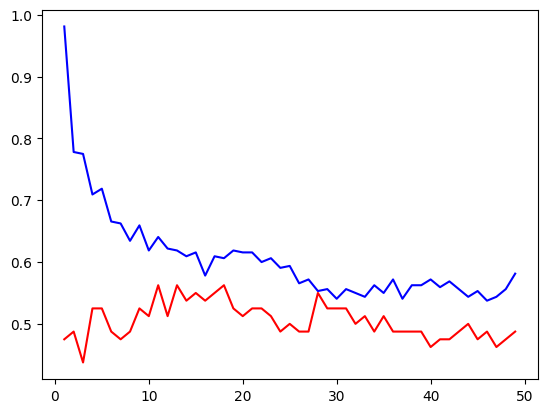

In [66]:
Train_score=[]
Test_score=[]
Best_score= 0
Best_k= 0
for i in range(1,50,1):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)

    Train_score.append(train_acc)
    Test_score.append(test_acc)

    if test_acc > Best_score:
        Best_score = test_acc
        Best_k = i
print(f"best score is {Best_score}  && best K is {Best_k}" )
    
plt.plot(np.arange(1,50,1), np.array(Train_score), 'b-')
plt.plot(np.arange(1,50,1), np.array(Test_score), 'r-')

In [44]:
df['Purchased'].value_counts()


Purchased
0    257
1    143
Name: count, dtype: int64